In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
import math, time
import itertools
# from sklearn import preprocessing
import datetime
from operator import itemgetter
# from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
import seaborn as sns

Using TensorFlow backend.


In [2]:
# import data
googl = pd.read_csv('googl.csv')
googl.head(5)

,Date,Open,High,Low,Close,Volume
0,24-Mar-17,842.00,844.00,829.10,835.14,2105682
1,23-Mar-17,841.39,841.69,833.00,839.65,3287669
2,22-Mar-17,849.48,855.35,847.00,849.80,1366749
3,21-Mar-17,870.06,873.47,847.69,850.14,2537978
4,20-Mar-17,869.48,870.34,864.66,867.91,1542199


In [3]:
# googl = googl.iloc[::-1]
googl = googl.reindex(index= googl.index[::-1])
# googl.head(5)

In [4]:
googl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3171 entries, 3170 to 0
Data columns (total 6 columns):
Date      3171 non-null object
Open      3171 non-null float64
High      3171 non-null float64
Low       3171 non-null float64
Close     3171 non-null float64
Volume    3171 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 148.7+ KB


In [5]:
googl['Date']= pd.to_datetime(googl['Date'])

In [6]:
# googl.tail()
googl = googl.drop(['Date', 'Volume', 'Low'], axis=1)
googl.tail()

,Open,High,Close
4,869.48,870.34,867.91
3,870.06,873.47,850.14
2,849.48,855.35,849.80
1,841.39,841.69,839.65
0,842.00,844.00,835.14


In [7]:
googl.to_csv('google-stock-24-3-2017.csv')

In [8]:
googl = pd.read_csv('google-stock-24-3-2017.csv')
googl = googl.drop(['Unnamed: 0'], axis=1)

In [9]:
googl.head()

,Open,High,Close
0,50.06,52.08,50.22
1,50.79,54.59,54.21
2,55.44,56.80,54.75
3,55.68,55.86,52.49
4,52.53,54.05,53.05


In [10]:
len(googl.as_matrix())

3171

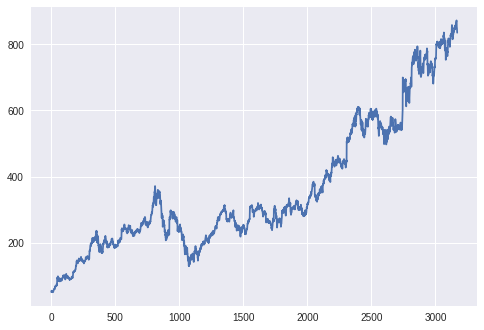

In [12]:
plt.plot(googl['Close'])
plt.show()

In [21]:
# NOrmalize data 

googl['Open'] = googl['Open']/100
googl['Close'] = googl['Close']/100
googl['High'] = googl['High']/100
googl.head()

,Open,High,Close
0,0.5006,0.5208,0.5022
1,0.5079,0.5459,0.5421
2,0.5544,0.5680,0.5475
3,0.5568,0.5586,0.5249
4,0.5253,0.5405,0.5305


In [22]:
# d=googl.head(5)
# # print(d.as_matrix())
# d=d.as_matrix()
# l=[]
# for i in range(len(d) - 3):
#     l.append(d[i:i+3])
# l = np.array(l)
# print(l)
# print(l.shape)
# row = round(0.9*l.shape[0])
# print('trainx',l[:, :-1])
# print('trainy', l[:,-1][:,-1])

In [44]:
def preprocess_data(stock, seq_len, split_frac=0.9):
    amount_of_features = len(stock.columns)
    data = stock.as_matrix() #pd.DataFrame(stock)
    sequence_length = seq_len + 1
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])

    result = np.array(result)
    row = round(split_frac* result.shape[0])
    train = result[:int(row), :]
    x_train = train[:, :-1]
    y_train = train[:, -1][:,-1]
    x_test = result[int(row):, :-1]
    y_test = result[int(row):, -1][:,-1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))  

    return [x_train, y_train, x_test, y_test]

In [45]:
def build_model(layers):
        d = 0.2
        model = Sequential()
        model.add(LSTM(128, input_shape=(layers[1], layers[0]), return_sequences=True))
        model.add(Dropout(d))
        model.add(LSTM(64, input_shape=(layers[1], layers[0]), return_sequences=False))
        model.add(Dropout(d))
        model.add(Dense(16,init='uniform',activation='relu'))        
        model.add(Dense(1,init='uniform',activation='linear'))
        model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
        return model

In [46]:
X_train, y_train, X_test, y_test = load_data(googl,seq_len=30)
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (2826, 30, 3)
y_train (2826,)
X_test (314, 30, 3)
y_test (314,)


In [47]:
model = build_model([3,30,1])

/home/vyom/anaconda3/envs/CERN/lib/python3.5/site-packages/keras/legacy/interfaces.py:86: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(16, kernel_initializer="uniform", activation="relu")`
  '` call to the Keras 2 API: ' + signature)
/home/vyom/anaconda3/envs/CERN/lib/python3.5/site-packages/keras/legacy/interfaces.py:86: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform", activation="linear")`
  '` call to the Keras 2 API: ' + signature)


In [39]:
model.fit(
    X_train,
    y_train,
    batch_size=512,
    nb_epoch=10,
    validation_split=0.1,
    verbose=2)

/home/vyom/anaconda3/envs/CERN/lib/python3.5/site-packages/keras/models.py:826: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 2543 samples, validate on 283 samples
Epoch 1/10
17s - loss: 9.6631 - acc: 0.0000e+00 - val_loss: 36.8415 - val_acc: 0.0000e+00
Epoch 2/10
16s - loss: 9.3621 - acc: 0.0000e+00 - val_loss: 36.0195 - val_acc: 0.0000e+00
Epoch 3/10
18s - loss: 8.9040 - acc: 0.0000e+00 - val_loss: 34.7682 - val_acc: 0.0000e+00
Epoch 4/10
22s - loss: 8.2091 - acc: 0.0000e+00 - val_loss: 32.7563 - val_acc: 0.0000e+00
Epoch 5/10
24s - loss: 7.2242 - acc: 0.0000e+00 - val_loss: 30.2533 - val_acc: 0.0000e+00
Epoch 6/10
26s - loss: 6.1438 - acc: 0.0000e+00 - val_loss: 27.4985 - val_acc: 0.0000e+00
Epoch 7/10
27s - loss: 5.0239 - acc: 0.0000e+00 - val_loss: 24.4215 - val_acc: 0.0000e+00
Epoch 8/10
28s - loss: 3.9238 - acc: 0.0000e+00 - val_loss: 21.1076 - val_acc: 0.0000e+00
Epoch 9/10
29s - loss: 2.9140 - acc: 0.0000e+00 - val_loss: 17.7448 - val_acc: 0.0000e+00
Epoch 10/10
30s - loss: 2.1626 - acc: 0.0000e+00 - val_loss: 14.6377 - val_acc: 0.0000e+00


In [51]:

trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))

Train Score: 12.52 MSE (3.54 RMSE)
Test Score: 60.66 MSE (7.79 RMSE)


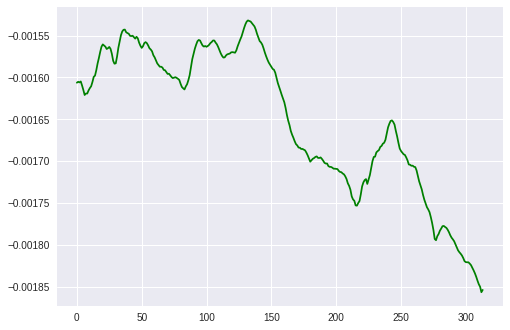

In [50]:
p = model.predict(X_test)

plt.plot(p, color='g', label='predictions')
# plt.plot(y_test, color='b', label='actual data')
plt.show()

# plt.plot(p, 'g', label='prdictions')
# plt.show()